# CSE2530 Computational Intelligence
## Assignment 2: Artificial Neural Networks

<div>

_Fill in your group number **from Brightspace**, names, and student numbers._
    
|    Group   |           69          |
|------------|----------------------|
| Szymon Krętowski  |        6128351       |
| Student B  |        XXXXXXX       |
| Student C  |        XXXXXXX       |
| Student D  |        XXXXXXX       |

</div>

#### Imports

In [23]:
# You may only use numpy to implement your neural network
# You are not allowed to use scikit-learn, other than for Section 1.6.
# You are also not allowed to use Pytorch, Tensorflow, and similar machine learning frameworks.
# You can make use of any other libraries for miscellaneous functions, e.g. to create the visual aids.

# Put all of your imports in this code block
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Loading the data

In [24]:
features = np.genfromtxt("../data/features.txt", delimiter=",")
targets = np.genfromtxt("../data/targets.txt", delimiter=",")
unknown = np.genfromtxt("../data/unknown.txt", delimiter=",")

## 1 Questions
### 1.2 Architecture
#### Question 1:

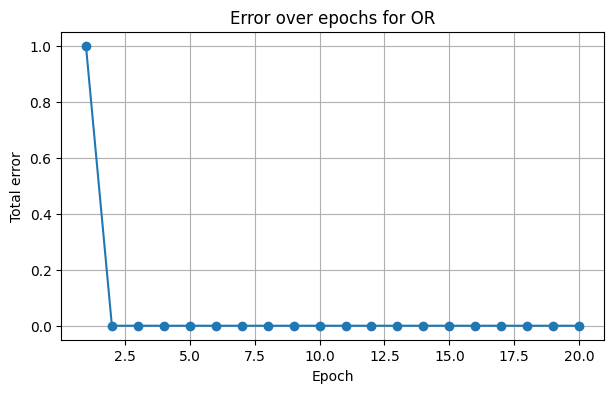

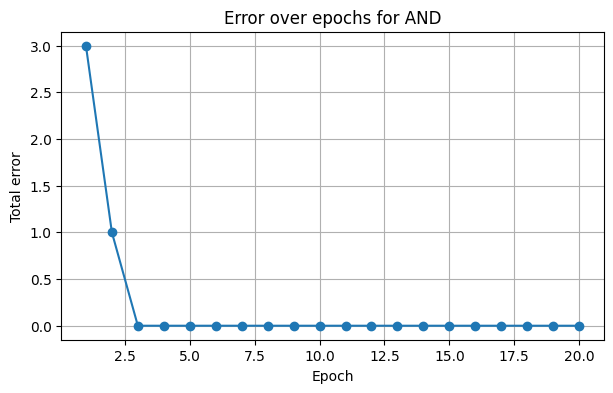

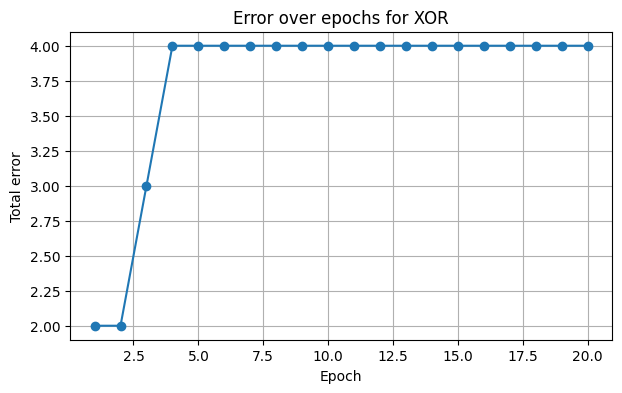

OR predictions: [0, 1, 1, 1]
AND predictions: [0, 0, 0, 1]
XOR predictions: [1, 1, 0, 0]


In [25]:
# Put your code for Question 1 here
np.random.seed(0)

class Perceptron:
    def __init__(self, input_size, alpha=0.1):
        self.weights = np.random.randn(input_size) * 0.1
        self.bias = np.random.randn() * 0.1
        self.alpha = alpha

    def predict(self, x):
        z = np.dot(x, self.weights) + self.bias
        if z >= 0:
            return 1
        else:
            return 0

    def train(self, X, y, epochs):
        errors = []

        for epoch in range(epochs):
            total_error = 0

            for i in range(len(X)):
                x_i = X[i]
                y_true = y[i]

                y_pred = self.predict(x_i)
                L = y_true - y_pred

                # perceptron update rule
                self.weights = self.weights + self.alpha * L * x_i
                self.bias = self.bias + self.alpha * L

                total_error += abs(L)

            errors.append(total_error)

        return errors


# input values
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# target values
y_or = np.array([0, 1, 1, 1])
y_and = np.array([0, 0, 0, 1])
y_xor = np.array([0, 1, 1, 0])

epochs = 20


# OR
p_or = Perceptron(2, alpha=0.1)
errors_or = p_or.train(X, y_or, epochs)

plt.figure(figsize=(7, 4))
plt.plot(range(1, epochs + 1), errors_or, marker='o')
plt.title("Error over epochs for OR")
plt.xlabel("Epoch")
plt.ylabel("Total error")
plt.grid(True)
plt.show()


# AND
p_and = Perceptron(2, alpha=0.1)
errors_and = p_and.train(X, y_and, epochs)

plt.figure(figsize=(7, 4))
plt.plot(range(1, epochs + 1), errors_and, marker='o')
plt.title("Error over epochs for AND")
plt.xlabel("Epoch")
plt.ylabel("Total error")
plt.grid(True)
plt.show()


# XOR
p_xor = Perceptron(2, alpha=0.1)
errors_xor = p_xor.train(X, y_xor, epochs)

plt.figure(figsize=(7, 4))
plt.plot(range(1, epochs + 1), errors_xor, marker='o')
plt.title("Error over epochs for XOR")
plt.xlabel("Epoch")
plt.ylabel("Total error")
plt.grid(True)
plt.show()


print("OR predictions:", [p_or.predict(x) for x in X])
print("AND predictions:", [p_and.predict(x) for x in X])
print("XOR predictions:", [p_xor.predict(x) for x in X])

<div>

_Put your code blocks above (if any) and write your answer here._

**Answer 1:**

In this part, we trained one single perceptron on the OR, AND and XOR functions.
The graphs show the total error in each epoch, so it is possible to see if the perceptron learns the function or not.

For the OR function, the error goes down and reaches 0 after some epochs. This means that after training, the perceptron can classify all input combinations correctly.
For the AND function, the same thing happens. The error also decreases to 0, so the perceptron is able to learn this function too.

For the XOR function, the error does not go to 0. It stays above 0 or changes between epochs. This shows that the perceptron is not able to learn XOR correctly.

The reason is that a single perceptron can only make a linear separation between classes.
The OR and AND functions are linearly separable, so they can be solved with one perceptron. There is a straight line that can separate the 0 outputs from the 1 outputs.

The XOR function is different, because it is not linearly separable. There is no single straight line that can separate its outputs correctly. Because of this, one perceptron is not enough for XOR.

So from these graphs, it can be seen that a single perceptron works for OR and AND, but not for XOR. This also shows why for more difficult problems we need a network with one or more hidden layers instead of only one perceptron.

</div>

#### Question 2

<div>

_Write your answer here._

**Answer 2:**

The network needs 10 input neurons.

This is because each sample in the dataset has 10 input features.
In a feed-forward neural network, usually one input neuron is used for each feature, so the input layer must have 10 neurons to pass all feature values into the network.

</div>

#### Question 3

<div>

_Write your answer here._

**Answer 3:**

The network needs 7 output neurons.

This is because the task is to classify each sample into one of 7 classes.
A practical way to do this is to use one output neuron per class. Then each output neuron represents one class, and the predicted class can be taken as the one with the highest output value.

</div>

#### Question 4

<div>

_Write your answer here._

**Answer 4:**

As an initial guess, we would use 1 hidden layer with 12 hidden neurons.

The task has 10 input features and 7 output classes, so the problem is more complex than a very small network, but it is also not extremely large. One hidden layer is a reasonable starting point, because a network with one hidden layer is already able to learn non-linear patterns. We chose 12 neurons as an initial value because it is slightly larger than the number of input features, which gives the network enough flexibility without making it too large at the start.

These values are only an initial guess, and later they should be tuned by testing performance on validation data.

</div>

#### Question 5

<div>

_Write your answer here._

**Answer 5:**

We would use the sigmoid activation function in the hidden layer and also in the output layer as an initial choice.

The sigmoid function is a sensible starting point because it was used a lot in the lecture examples and it introduces non-linearity, which is needed so the network can learn more complex patterns than a single perceptron. Without a non-linear activation function, the network would still behave like a linear model.

For the output layer, using sigmoid means each output neuron gives a value between 0 and 1. Then the predicted class can be chosen as the output neuron with the highest value.

This is an initial design choice, and later it can be compared with other options if needed.

</div>

#### Question 6

<div>

_Write your answer here. You can include images using the syntax !.[title].(filepath), removing decimal points therein._



**Answer 6:**

The diagram shows the complete feed-forward neural network based on the previous answers.

It has:

10 input neurons, because each sample has 10 features,

1 hidden layer with 12 neurons, as the initial design choice,

7 output neurons, because the problem has 7 classes.

The network is fully connected, so each neuron in one layer is connected to all neurons in the next layer.
This gives the topology 10 → 12 → 7.

</div>

### 1.3 Training

When coding a neural network from scratch, it helps to think of a layer as an individual component that can be easily combined with other layers. To help you create a modular implementation of a neural network, we provide you with a template for the implementation along with some explanations.

**Note that using the template below is not mandatory. You may choose to modify this template or implement your own version of the neural network altogether. If the latter, please remove our template from the notebook and ensure that it instead includes a complete, fully functional implementation of your own.**

**Linear (fully connected) layer**

A linear or fully connected layer maps the input data to an output by performing a linear transformation, where each input neuron is connected to every output neuron. The forward pass of a linear layer is computed as $y = wx + b$, where $w$ and $b$ are trainable parameters. The gradients of the loss with respect to $w$ and $b$ are defined using the chain rule:

$$\frac{\partial \mathcal{L}}{\partial w}=\frac{\partial \mathcal{L}}{\partial y} \cdot \frac{\partial y}{\partial w}, \quad \frac{\partial \mathcal{L}}{\partial b}=\frac{\partial \mathcal{L}}{\partial y} \cdot \frac{\partial y}{\partial b}, $$

where $\frac{\partial \mathcal{L}}{\partial y}$ is the upstream gradient i.e., the gradient flowing from deeper layers into the current layer, and the other two terms are the local gradients:

$$
\frac{\partial y}{\partial w}=x, \quad \frac{\partial y}{\partial b}=1.
$$

Since $x$ is needed to compute the gradients, we can store (cache) its value during the forward pass. Finally, we need to return a downstream gradient so that more shallow layers can use it as their upstream gradient. The downstream gradient of a layer is simply its upstream gradient multiplied by the local gradient of its ouput with respect to its input:

$$
\frac{\partial \mathcal{L}}{\partial x}=\frac{\partial \mathcal{L}}{\partial y} \cdot \frac{\partial y}{\partial x}
$$

**Note.** Be aware of how you multiply the arrays, it might be useful to print the shapes of each array and to think about the desired shape of the output.  

In [26]:
class Linear:
    def __init__(self, in_features, out_features):
        """ Randomly initialize the weights and biases.

        Args:
            in_features: number of input features.
            out_features: number of output features.
        """

        limit = np.sqrt(6 / (in_features + out_features))
        self.weight = np.random.uniform(-limit, limit, (out_features, in_features))
        self.bias = np.zeros(out_features)

        self.cache = None
        # For storing the gradients w.r.t. the weight and the bias
        self.weight_grad = None
        self.bias_grad = None

    def forward(self, x):
        """ Perform the forward pass of a linear layer. 
        Store (cache) the input so it can be used in the backward pass.

        Args:
            x: input of a linear layer.

        Returns: 
            y: output of a linear layer. 
        """
        self.cache = x
        y = np.dot(self.weight, x) + self.bias
        return y
    
    def backward(self, dupstream):
        """ Perform the backward pass of a linear layer.  

        Args:
            dupstream: upstream gradient. 

        Returns:
            dx: downstream gradient.
        """
       
        x = self.cache

        # gradients of parameters
        self.weight_grad = np.outer(dupstream, x)
        self.bias_grad = dupstream.copy()

        # gradient to pass to previous layer
        dx = np.dot(self.weight.T, dupstream)

        return dx

**Activation functions**

You also need to implement an activation function suitable for the task at hand.

Think about how to perform the backward pass i.e., what is the local gradient and what the downstream gradient should be. Do not forget to take the upstream gradient into account.

In [27]:
class Activation:
    def __init__(self):
        self.cache = None
    
    def forward(self, x):
        """ Perform a forward pass of your activation function.
        Store (cache) the output so it can be used in the backward pass.

        Args:
            x: input to the activation function. 

        Returns:
            y: output of the activation function.
        """

        y = 1 / (1 + np.exp(-x))
        self.cache = y
        return y
    
    def backward(self, dupstream): 
        """ Perform a backward pass of the activation function. 
        Make sure you do not modify the original dupstream.

        Args:
            dupstream: upstream gradient. 

        Returns:
            dx: downstream gradient.
        """
        
        y = self.cache
        local_grad = y * (1 - y)
        dx = dupstream * local_grad
        return dx

**Network** 

Now that you have implemented a `Linear` layer and an activation function, you can combine them in different ways and have the `Network` class perform forward and backward passes through all layer of the network in the specified order.

Additionally, you should make the `Network` class update all the trainable parameters of the network in `optimizer_step`.

In [28]:
class Network:
    def __init__(self, layers):
        self.layers = layers

    def forward(self, x):
        """ Perform a forward pass over the entire network.

        Args:
            x: input data. 

        Returns:
            y: predictions.
        """
        
        y = x
        for layer in self.layers:
            y = layer.forward(y)
        return y
    
    def backward(self, dupstream):
        """ Perform a backward pass over the entire network.

        Args:
            dupstream: upstream gradient. 

        Returns:
            dx: downstream gradient.
        """
        
        dx = dupstream
        for layer in reversed(self.layers):
            dx = layer.backward(dx)
        return dx
    
    def optimizer_step(self, lr):
        """ Update the weight and bias parameters of each layer.

        Args:
            lr: learning rate.
        """
        
        for layer in self.layers:
            if hasattr(layer, "weight") and layer.weight_grad is not None:
                layer.weight = layer.weight - lr * layer.weight_grad
                layer.bias = layer.bias - lr * layer.bias_grad

**Loss function**

You also need to implement a loss function that will measure how well your neural network performs at the task.

In [29]:
def Loss(y_true, y_pred):
    """ Computes the value of the loss function and its gradient.  

    Args:
        y_true: ground truth labels.
        y_pred: predicted labels.

    Returns:
        loss: value of the loss. 
        grad: gradient of loss with respect to the predictions. 
    """

    eps = 1e-12

    # if y_true is a single class index, convert it to one-hot
    if np.isscalar(y_true):
        one_hot = np.zeros_like(y_pred)
        one_hot[int(y_true)] = 1
        y_true = one_hot

    # numerically stable softmax
    shifted = y_pred - np.max(y_pred)
    exp_values = np.exp(shifted)
    probs = exp_values / np.sum(exp_values)

    # cross-entropy loss
    loss = -np.sum(y_true * np.log(probs + eps))

    # gradient w.r.t. logits
    grad = probs - y_true

    return loss, grad

**Training loop**

Finally, define a training loop in which for each optimizer step you:

1. Obtain the predictions by performing a forward pass of the network;

2. Compute the loss and its gradient by comparing the predictions with the ground truth according to the selected criterion;

3. Perform a backward pass of the network;

4. Update all parameters of the network i.e, take an optimizer step.

In [30]:
def train(net, inputs, labels, criterion, lr):
    """Trains the neural network.

    Args:
        net: network or model. 
        inputs: input data.
        labels: labels. 
        criterion: loss function.
        lr: learning rate.

    Returns:
        losses: a list containing the loss at every optimizer step. 
        accuracies: a list containing the accuracy at every optimizer step. 
    """
    
    losses = []
    accuracies = []

    # shuffle data for this epoch
    indices = np.random.permutation(len(inputs))

    correct = 0

    for step, idx in enumerate(indices):
        x = inputs[idx]
        y_true = labels[idx]

        # forward pass
        y_pred = net.forward(x)

        # loss and first gradient
        loss, grad = criterion(y_true, y_pred)

        # backward pass
        net.backward(grad)

        # update parameters
        net.optimizer_step(lr)

        # keep track of metrics
        losses.append(loss)

        pred_class = np.argmax(y_pred)
        if np.isscalar(y_true):
            true_class = int(y_true)
        else:
            true_class = np.argmax(y_true)

        if pred_class == true_class:
            correct += 1

        accuracies.append(correct / (step + 1))

    return losses, accuracies

#### Question 7

<div>

_Put your code blocks above (if any) and write your answer here._

**Answer 7:**

To get an unbiased estimate of performance, We would divide the labeled data into three parts:

training set

validation set

test set

A sensible split is for example:

70% training

15% validation

15% test

The training set is used to learn the weights of the network during backpropagation.
The validation set is used to tune hyperparameters, such as the number of hidden neurons, number of hidden layers, learning rate, and number of epochs.
The test set is only used at the very end to evaluate the final model. This gives a more unbiased estimate of how well the network performs on unseen data.

This is important because if the test set is used during training or tuning, the performance estimate can become too optimistic.

To make the results reproducible, the data should be shuffled in a controlled way and a fixed random seed should be used before splitting. This ensures that the same train/validation/test split is created every time the notebook is run. It is also important to keep the test set separate and unchanged during all experiments.

</div>

#### Question 8

<div>

_Put your code blocks above (if any) and write your answer here._

**Answer 8:**

We would mainly evaluate the performance of the network using classification accuracy on the validation set and test set.

Accuracy is calculated as the fraction of correctly classified samples:

accuracy = (number of correct predictionstotal number of predictions)/(total number of predictionsnumber of correct predictions​)

This is a sensible metric because the assignment is a multi-class classification problem.
For each sample, the network predicts one of 7 classes, so the most direct way to measure performance is to check how many of these predictions are correct.

During development, We would use the validation accuracy to compare different choices of hyperparameters, such as the number of hidden neurons, number of layers, learning rate, and number of epochs. After the final model is chosen, We would report the test accuracy to estimate how well the network performs on unseen data.

Besides accuracy, it is also useful to monitor the loss during training, because it shows whether the network is still learning or if training has stabilized. However, accuracy is the main performance measure here, because it directly reflects the quality of the final class predictions.

</div>

#### Question 9

<div>

_Put your code blocks above (if any) and write your answer here._

**Answer 9:**

We would stop training when the performance on the validation set stops improving.
A practical way to do this is to use early stopping. After each epoch, we can check the validation accuracy or validation loss, and if it does not improve for several epochs in a row, we stop the training.

This is a sensible approach because at the start of training, the network usually improves on both the training data and the validation data. After some point, however, the network can start to overfit the training set. In that case, the training performance may still improve, but the validation performance will stop improving or even get worse.

By stopping training when the validation performance no longer improves, we can keep the model at the point where it generalizes better to unseen data. This also avoids wasting time on extra epochs that do not give a real improvement.

So we mainly choose to end the training in order to:

prevent overfitting

save computation time

keep the model at its best validation performance

As an extra safety measure, we would also set a maximum number of epochs, so that training always stops even if early stopping is not triggered.

</div>

#### Question 10

In [34]:
# load data
features = pd.read_csv("../data/features.txt", header=None).values
targets = pd.read_csv("../data/targets.txt", header=None).values.flatten()

# reproducible shuffle
np.random.seed(42)
indices = np.random.permutation(len(features))

X = features[indices]
y = targets[indices].astype(int)

if y.min() == 1:
    y = y - 1

n = len(X)
n_train = int(0.7 * n)
n_val = int(0.15 * n)

X_train = X[:n_train]
y_train = y[:n_train]

X_val = X[n_train:n_train + n_val]
y_val = y[n_train:n_train + n_val]

X_test = X[n_train + n_val:]
y_test = y[n_train + n_val:]

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (5497, 10) (5497,)
Validation set: (1178, 10) (1178,)
Test set: (1179, 10) (1179,)


uniform
validation accuracies: [0.9185059422750425, 0.9219015280135824, 0.9125636672325976, 0.9185059422750425, 0.9074702886247877, 0.9159592529711376, 0.9219015280135824, 0.9142614601018676, 0.9244482173174873, 0.9278438030560272]
mean validation accuracy: 0.9183361629881155

normal
validation accuracies: [0.9134125636672326, 0.9252971137521222, 0.9100169779286927, 0.9176570458404074, 0.9125636672325976, 0.9227504244482173, 0.9193548387096774, 0.9193548387096774, 0.9015280135823429, 0.9108658743633277]
mean validation accuracy: 0.9152801358234294



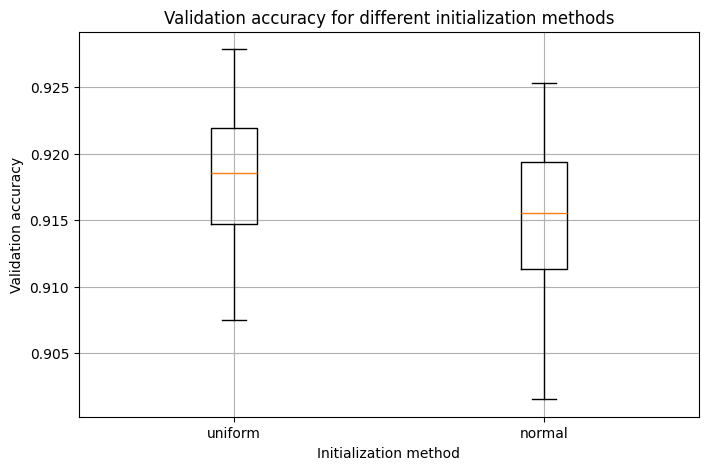

In [ ]:
class Linear:
    def __init__(self, in_features, out_features, init_method="uniform"):
        self.cache = None
        self.weight_grad = None
        self.bias_grad = None

        if init_method == "uniform":
            limit = np.sqrt(6 / (in_features + out_features))
            self.weight = np.random.uniform(-limit, limit, (out_features, in_features))
        elif init_method == "normal":
            self.weight = np.random.randn(out_features, in_features) * 0.1
        else:
            raise ValueError("init_method must be 'uniform' or 'normal'")

        self.bias = np.zeros(out_features)

    def forward(self, x):
        self.cache = x
        y = np.dot(self.weight, x) + self.bias
        return y

    def backward(self, dupstream):
        x = self.cache
        self.weight_grad = np.outer(dupstream, x)
        self.bias_grad = dupstream.copy()
        dx = np.dot(self.weight.T, dupstream)
        return dx


def build_network(init_method):
    layers = [
        Linear(10, 12, init_method=init_method),
        Activation(),
        Linear(12, 7, init_method=init_method)
    ]
    return Network(layers)


def accuracy(net, x_data, y_data):
    correct = 0

    for i in range(len(x_data)):
        y_pred = net.forward(x_data[i])
        pred_class = np.argmax(y_pred)

        if np.isscalar(y_data[i]):
            true_class = int(y_data[i])
        else:
            true_class = np.argmax(y_data[i])

        if pred_class == true_class:
            correct += 1

    return correct / len(x_data)


init_methods = ["uniform", "normal"]
results = {method: [] for method in init_methods}

runs = 10
epochs = 30
lr = 0.1

for method in init_methods:
    for run in range(runs):
        np.random.seed(run)

        net = build_network(method)

        for epoch in range(epochs):
            train(net, X_train, y_train, Loss, lr)

        val_acc = accuracy(net, X_val, y_val)
        results[method].append(val_acc)

for method in init_methods:
    print(method)
    print("validation accuracies:", results[method])
    print("mean validation accuracy:", np.mean(results[method]))
    print()

plt.figure(figsize=(8, 5))
plt.boxplot([results[m] for m in init_methods], tick_labels=init_methods)
plt.title("Validation accuracy for different initialization methods")
plt.xlabel("Initialization method")
plt.ylabel("Validation accuracy")
plt.grid(True)
plt.show()

<div>

_Put your code blocks above (if any) and write your answer here._

**Answer 10:**

We trained the same network 10 times for each initialization method and compared the validation accuracy after training. In this experiment, we used two initialization approaches:

uniform

normal

The boxplot shows the distribution of the validation accuracies over the 10 runs for each method. This makes it possible to compare both the average performance and the variation between runs.

From the results, we can see that uniform initialization performed slightly better on average than normal initialization. The mean validation accuracy for uniform initialization was about 0.9183, while for normal initialization it was about 0.9153. The spread of the results is similar for both methods, although uniform initialization appears to be slightly more stable.

At the same time, the two boxplots overlap quite a lot, which means that the difference is not very large. This suggests that both initialization methods work reasonably well for this task, but uniform initialization is a slightly better choice in our experiment.

The initialization affects performance because it determines the starting weights of the network. Different starting weights lead to different activations and gradients in the first stages of training, so the network can follow slightly different learning paths. Because of this, even when the architecture and hyperparameters stay the same, the final validation accuracy can still vary between runs.

Overall, based on this experiment, we would choose uniform initialization, because it gave the best average validation performance and slightly more consistent results.


</div>

### 1.4 Optimization

#### Question 11

<div style="background-color:#f1be3e">

_Put your code blocks above (if any) and write your answer here._

</div>

#### Question 12

<div style="background-color:#f1be3e">

_Put your code blocks above (if any) and write your answer here._

</div>

### 1.5 Evaluation

#### Question 13

<div style="background-color:#f1be3e">

_Put your code blocks above (if any) and write your answer here._

</div>

#### Question 14

<div style="background-color:#f1be3e">

_Put your code blocks above (if any) and write your answer here._

</div>

#### Question 15

<div style="background-color:#f1be3e">

_Put your code blocks above (if any) and write your answer here._

</div>

### 1.6 Scikit-learn

#### Question 16

<div style="background-color:#f1be3e">

_Put your code blocks above (if any) and write your answer here._

</div>

#### Question 17

<div style="background-color:#f1be3e">

_Put your code blocks above (if any) and write your answer here._

</div>

### 1.7 Reflection

#### Question 18

<div style="background-color:#f1be3e">

_Write your answer here._

</div>

#### Question 19

<div style="background-color:#f1be3e">

_Write your answer here._

</div>

### 1.8 Pen and paper

#### Question 20

<div style="background-color:#f1be3e">

_Write your answer here. You can also choose to simply include a photo of your solution._

</div>

#### Question 21

<div style="background-color:#f1be3e">

_Write your answer here. You can also choose to simply include a photo of your solution._

</div>

### 1.9 Division of work

#### Question 22

<div style="background-color:#f1be3e">


|          Component          |  Name A   |  Name B   |  Name C   |  Name D   |
|-----------------------------|-----------|-----------|-----------|-----------|
| Code (design)               |     A     |     B     |     C     |     D     |
| Code (implementation)       |     A     |     B     |     C     |     D     |
| Code (validation)           |     A     |     B     |     C     |     D     |
| Experiments (execution)     |     A     |     B     |     C     |     D     |
| Experiments (analysis)      |     A     |     B     |     C     |     D     |
| Experiments (visualization) |     A     |     B     |     C     |     D     |
| Report (original draft)     |     A     |     B     |     C     |     D     |
| Report (reviewing, editing) |     A     |     B     |     C     |     D     |

</div>

### References

<div style="background-color:#f1be3e">

**If you made use of any non-course resources, cite them below.**

</div>